# Функции в Pandas
Примеры из презентации

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})
df

,user_id,clicks,orders
0,1,163,2
1,2,130,4
2,3,97,0


In [3]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0], 'calculated': [False, False, True]})
df[['user_id', 'clicks', 'orders', 'calculated']]

,user_id,clicks,orders,calculated
0,1,163,2,False
1,2,130,4,False
2,3,97,0,True


In [4]:
def watcher(param):
    """Мне только посмотреть"""
    return param == 0

In [5]:
df['watcher'] = df['orders'].apply(watcher)
df

,user_id,clicks,orders,calculated,watcher
0,1,163,2,False,False
1,2,130,4,False,False
2,3,97,0,True,True


Применяем метод apply к одному столбцу. Сейчас в переменную функции передаются значения одного столбца

In [6]:
def conversion(row):
    """Подсчет конверсии переходов в покупки"""
    return row['orders'] / row['clicks']

### Как потестировать функцию со значениями одной строки

In [7]:
row1 = pd.DataFrame({'clicks': [163], 
                     'orders': [2], 
                     'user_id': [1]})
conversion(row1)

0    0.01227
dtype: float64

Применяем метод apply к датафрейму. В переменную функции передаются строки целиком

In [8]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})
df[['user_id', 'clicks', 'orders']]

,user_id,clicks,orders
0,1,163,2
1,2,130,4
2,3,97,0


In [9]:
df['conversion'] = df.apply(conversion, axis=1)

In [10]:
df[['user_id', 'clicks', 'orders', 'conversion']]

,user_id,clicks,orders,conversion
0,1,163,2,0.012270
1,2,130,4,0.030769
2,3,97,0,0.000000


### Как создавать столбцы с помощью функций

In [11]:
df = pd.DataFrame({'user_id': [1, 2, 3]})

In [12]:
df

,user_id
0,1
1,2
2,3


In [13]:
def metriks(row):
    """Возвращает новый столбец в зависимости от значения user_id"""
    user_id = row.user_id
    
    return pd.Series({'col_{}'.format(user_id): 1})

In [14]:
df = df.apply(metriks, axis=1)
df

,col_1,col_2,col_3
0,1.0,NaN,NaN
1,NaN,1.0,NaN
2,NaN,NaN,1.0


### Анализ рекламных кампаний

In [15]:
import pandas as pd

In [17]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.5 MB/s eta 0:00:001.4 MB/s eta 0:00:01


In [18]:
stats = pd.read_excel('ad_campaigns.xlsx')
stats.head()

,Название группы,Фраза (с минус-словами),Продуктивность,ID объявления,Заголовок,Текст,Ссылка
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


In [19]:
stats.columns = ['group', 'phrase', 'effect', 'ad_id', 'title', 'text', 'link']
stats.head()

,group,phrase,effect,ad_id,title,text,link
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


### Lambda-функции
Хотим посчитать распределение количества слов в столбце с фразами

In [20]:
phrase = 'МРТ на Менделеевской от 2000'

In [21]:
len(phrase.split(' '))

5

In [22]:
stats['word_count'] = stats['phrase'].apply(lambda word: len(word.split(' ')))
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [23]:
# вариант с передачей всей строчки функции
# тут надо обязательно указать параметр axis = 1

stats['word_count'] = stats.apply(lambda x: len(x['phrase'].split(' ')), axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


Простая визуализация

In [24]:
%matplotlib inline

<AxesSubplot: >

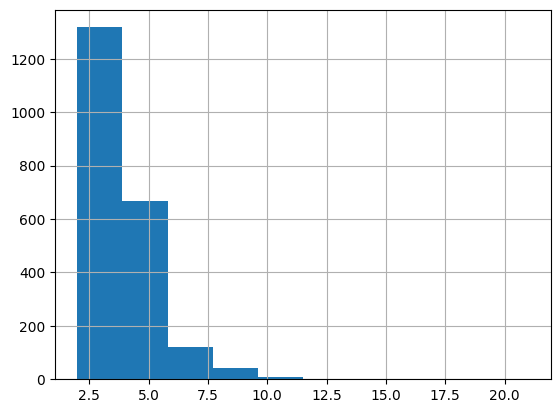

In [25]:
stats['word_count'].hist()

<AxesSubplot: >

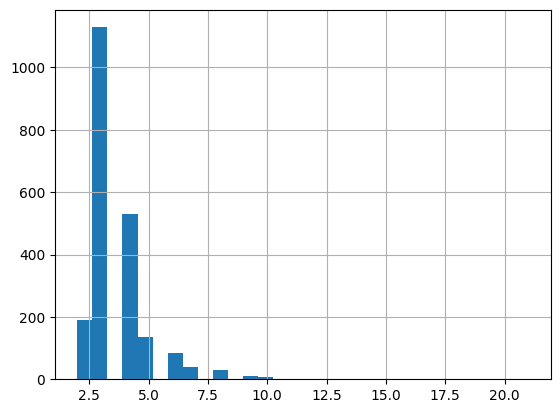

In [26]:
stats['word_count'].hist(bins=30)

### Упражнение
Поисковые запросы с каким количеством слов встречаются в наших данных чаще всего? Выведите топ-5

In [31]:
stats['word_count'].value_counts().head(5)

3    1129
4     529
2     189
5     137
6      84
Name: word_count, dtype: int64

### Произвольные функции
В URL кампаний есть названия. С этим надо что-то делать

In [32]:
# пример ссылки
url = stats.loc[0, 'link']
url

'https://awesome-site.ru/?utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_{device_type}'

In [33]:
from urllib import parse

In [34]:
parse.urlsplit('https://ya.ru/news/sport?search=footbal#abc')

SplitResult(scheme='https', netloc='ya.ru', path='/news/sport', query='search=footbal', fragment='abc')

In [35]:
parsed = parse.urlsplit(url)
parsed

SplitResult(scheme='https', netloc='awesome-site.ru', path='/', query='utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_{device_type}', fragment='')

In [36]:
# можно конечно вручную
parsed.query.split('&')[2].split('=')[1]

'a825749b87'

In [37]:
# как доставать значения

parsed.netloc

'awesome-site.ru'

In [38]:
params = parse.parse_qs(parsed.query)
params

{'utm_source': ['yandex'],
 'utm_medium': ['cpc'],
 'utm_campaign': ['a825749b87'],
 'utm_content': ['dev_{device_type}']}

In [39]:
# вот и кампании

params['utm_campaign'][0]

'a825749b87'

In [40]:
# зачем тут везде списки?

url_with_doubles = 'https://awesome-site.ru/?a=1&a=2&a=3'

parsed = parse.urlsplit(url_with_doubles)
parse.parse_qs(parsed.query)

{'a': ['1', '2', '3']}

In [41]:
# оборачиваем все в функцию
# в качестве аргумента будет строка датафрейма

def campaign_name(row):
    """Получение названия кампании из ссылки внутри строки row"""

    parsed = parse.urlsplit(row['link'])
    params_dict = parse.parse_qs(parsed.query)

    return params_dict['utm_campaign'][0]

In [42]:
# проверяем датафрейм
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [43]:
stats['campaign'] = stats.apply(campaign_name, axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca


### Как передать в функцию несколько аргументов

In [44]:
# как передать несколько аргументов

def power_up(row, n):
    """Возводит значение столбца effect в степень n"""
    return row['effect'] ** n

In [45]:
stats['power_up'] = stats.apply(power_up, n=3, axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign,power_up
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,91.125
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,91.125
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87,405.224
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,125.000
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,125.000


### Упражнение
В наших данных есть много объявлений с услугой МРТ (в столбце group есть слово 'мрт') круглосуточно (в тексте объявления text есть '24 часа'). Отфильтруйте строки, в которых НЕ упоминается МРТ, но прием идет круглосуточно. Сколько таких строк в датасете?

In [115]:
def filt(row):
    if  "мрт" not in row[0].lower() and "24 часа" in row[1].lower()  :
        return True
    return False

In [ ]:
#df[df.columns[1:4]]

In [64]:
up_stats = stats[["group","text"]]

In [67]:
up_stats

,group,text
0,мрт менделеевская,24 часа. МРТ в день обращения. Консультация вр...
1,мрт цао,24 часа. МРТ в день обращения. Консультация вр...
2,мрт цао,24 часа. МРТ в день обращения. Консультация вр...
3,мрт цао,24 часа. МРТ в день обращения. Консультация вр...
4,мрт сао,24 часа. МРТ в день обращения. Консультация вр...
...,...,...
2154,мрт палиха,24 часа. МРТ в день обращения. Консультация вр...
2155,клиника москва мрт,24 часа. МРТ в день обращения. Консультация вр...
2156,клиника москва мрт,24 часа. МРТ в день обращения. Консультация вр...
2157,клиника москва мрт,24 часа. МРТ в день обращения. Консультация вр...


In [117]:
up_stats.apply(filt, axis=1).value_counts()

False    2120
True       39
dtype: int64

In [120]:
len(up_stats[up_stats.apply( lambda row: "мрт" not in row[0].lower() and "24 часа" in row[1].lower(), axis=1)])

39

In [122]:
len(up_stats[~up_stats.apply( lambda row: "мрт" not in row[0].lower() and "24 часа" in row[1].lower(), axis=1)])

2120

In [ ]:
up_stats.apply(lambda x: if  "мрт" not in row[0].lower() and "24 часа" in row[1].lower(), axis=1)[0]

# Группировки

In [123]:
df = pd.DataFrame({'order_id': [1, 2, 3, 4, 5], 'country': ['Россия', 'Китай', 'Китай', 'Россия', 'Россия'], 
                   'category': ['Электроника', 'Авто', 'Электроника', 'Авто', 'Авто'], 
                   'amount': [100, 80, 90, 140, 90]})
df

,order_id,country,category,amount
0,1,Россия,Электроника,100
1,2,Китай,Авто,80
2,3,Китай,Электроника,90
3,4,Россия,Авто,140
4,5,Россия,Авто,90


### Упражнение
Создайте датафрейм df_russia, в котором оставьте заказы из России. И аналогично df_china (заказы из Китая).

In [126]:
df_china = df[df['country'] == 'Китай']
df_china

,order_id,country,category,amount
1,2,Китай,Авто,80
2,3,Китай,Электроника,90


In [128]:
df_russia = df[df['country'] == 'Россия']
df_russia

,order_id,country,category,amount
0,1,Россия,Электроника,100
3,4,Россия,Авто,140
4,5,Россия,Авто,90


### Упражнение
Посчитайте для df_russia и df_china:
- среднюю стоимость заказа
- разницу между максимальной и минимальной стоимостью заказа

In [132]:
sum(df_russia['amount'])/len(df_russia), max(df_russia['amount']) - min(df_russia['amount'])

(110.0, 50)

In [133]:
sum(df_china['amount'])/len(df_china), max(df_china['amount']) - min(df_china['amount'])

(85.0, 10)

Объединим процесс разбиения на датафреймы

In [134]:
def groupby_function(data):
    return data.amount.max() - data.amount.min()

In [135]:
df.groupby('country').apply(groupby_function)

country
Китай     10
Россия    50
dtype: int64

Вернемся к статистике рекламных кампаний

In [136]:
# раньше использовали value_counts

stats['campaign'].value_counts().head()

7f35591a28    456
8e77a0e565    348
2cc2e7d770    240
f6d2ae1e3d    220
e90f4db55a    218
Name: campaign, dtype: int64

In [137]:
# более универсальный способ

stats.groupby('campaign').count().head()

,group,phrase,effect,ad_id,title,text,link,word_count,power_up
campaign,,,,,,,,,
034ada41b6,3,3,3,3,3,3,3,3,3
03fcaecd1d,2,2,2,2,2,2,2,2,2
0697a81555,2,2,2,2,2,2,2,2,2
08cdcb57a3,3,3,3,3,3,3,3,3,3
0f0ba311fb,2,2,2,2,2,2,2,2,2


In [138]:
stats.groupby('campaign').count()[['group', 'effect']].head()

,group,effect
campaign,,
034ada41b6,3,3
03fcaecd1d,2,2
0697a81555,2,2
08cdcb57a3,3,3
0f0ba311fb,2,2


### Как вернуть столбец из индекса - метод reset_index()

In [139]:
stats.groupby('campaign').count().reset_index().head()

,campaign,group,phrase,effect,ad_id,title,text,link,word_count,power_up
0,034ada41b6,3,3,3,3,3,3,3,3,3
1,03fcaecd1d,2,2,2,2,2,2,2,2,2
2,0697a81555,2,2,2,2,2,2,2,2,2
3,08cdcb57a3,3,3,3,3,3,3,3,3,3
4,0f0ba311fb,2,2,2,2,2,2,2,2,2


### К группировке можно применять разные функции такие образом:

In [140]:
obj = stats.groupby('campaign')

In [141]:
obj.max().head()

,group,phrase,effect,ad_id,title,text,link,word_count,power_up
campaign,,,,,,,,,
034ada41b6,в недорого москва мрт,в москве открытого типа адрес мрт -цена,9.0,2428554779,Адрес МРТ открытого типа в Москве,24 часа. От 2 000₽. Консультация врача бесплат...,https://awesome-site.ru/?utm_source=yandex&utm...,7,729.000
03fcaecd1d,сделать мрт сущевский вал,сделать мрт стромынка,6.5,2101705759,Сделайте МРТ на ул. Стромынка!,24 часа. От 2 000₽. Консультация врача бесплат...,https://awesome-site.ru/?utm_source=yandex&utm...,3,274.625
0697a81555,мрт позвоночника сущевский вал,мрт позвоночника стромынка,5.5,2101706415,МРТ позвоночника на ул. Стромынка,24 часа. От 2 000₽. Консультация врача бесплат...,https://awesome-site.ru/?utm_source=yandex&utm...,3,166.375
08cdcb57a3,мрт сао,мрт сао -головы -москве -позвоночника -сделать...,7.4,2101705000,МРТ в САО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,7,405.224
0f0ba311fb,сделать мрт октябрьский,сделать мрт новослободская,6.4,2101705726,Сделайте МРТ на Новослободской,24 часа. От 2 000₽. Консультация врача бесплат...,https://awesome-site.ru/?utm_source=yandex&utm...,3,262.144


In [142]:
obj.mean().head()

/tmp/ipykernel_66941/919942432.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  obj.mean().head()


,effect,ad_id,word_count,power_up
campaign,,,,
034ada41b6,7.200000,2.428555e+09,6.333333,470.682000
03fcaecd1d,5.250000,2.101706e+09,3.000000,169.312500
0697a81555,4.750000,2.101706e+09,3.000000,115.187500
08cdcb57a3,6.133333,2.101705e+09,3.666667,245.991333
0f0ba311fb,5.400000,2.101706e+09,3.000000,173.664000


### Упражнение
Для каждой кампании campaign найдите минимальное значение столбца effect и постройте рейтинг кампаний по этим значениям, начиная с самого низкого.

### Несколько функций в группировках

In [143]:
# задаем несколько функций сразу

stats.groupby('campaign').agg(['min', 'max'])['effect'].head()

,min,max
campaign,,
034ada41b6,4.1,9.0
03fcaecd1d,4.0,6.5
0697a81555,4.0,5.5
08cdcb57a3,5.5,7.4
0f0ba311fb,4.4,6.4


In [144]:
# разные метрики для разных столбцов

results = stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})
results.head()

effect         power_up
              min  max        mean
campaign                          
034ada41b6    4.1  9.0  470.682000
03fcaecd1d    4.0  6.5  169.312500
0697a81555    4.0  5.5  115.187500
08cdcb57a3    5.5  7.4  245.991333
0f0ba311fb    4.4  6.4  173.664000

### Как обращаться к вложенным столбцам

In [145]:
results['effect']['max'].head()

campaign
034ada41b6    9.0
03fcaecd1d    6.5
0697a81555    5.5
08cdcb57a3    7.4
0f0ba311fb    6.4
Name: max, dtype: float64

In [146]:
# или даже так
stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})['effect']['max'].head()

campaign
034ada41b6    9.0
03fcaecd1d    6.5
0697a81555    5.5
08cdcb57a3    7.4
0f0ba311fb    6.4
Name: max, dtype: float64

In [147]:
# группировка по нескольким столбцам

stats.groupby(['group', 'campaign']).count().head()

phrase  effect  ad_id  title  text  link  \
group                campaign                                               
1 5 москва мрт тесла 777160ba51       1       1      1      1     1     1   
                     8e77a0e565       1       1      1      1     1     1   
                     f0079349af       1       1      1      1     1     1   
1 градская мрт       7f35591a28       3       3      3      3     3     3   
1 мрт нагатинский    8e77a0e565       1       1      1      1     1     1   

                                 word_count  power_up  
group                campaign                          
1 5 москва мрт тесла 777160ba51           1         1  
                     8e77a0e565           1         1  
                     f0079349af           1         1  
1 градская мрт       7f35591a28           3         3  
1 мрт нагатинский    8e77a0e565           1         1

In [149]:
# максимальное число объявлений в одной группе

stats.groupby(['group', 'campaign']).count().sort_values('phrase', ascending=False)

,,phrase,effect,ad_id,title,text,link,word_count,power_up
group,campaign,,,,,,,,
мрт на алексеевской кулаков переулок 13,7f35591a28,3,3,3,3,3,3,3,3
мрт каширское шоссе,7f35591a28,3,3,3,3,3,3,3,3
мрт кутузовский,7f35591a28,3,3,3,3,3,3,3,3
мрт куркинское шоссе 30,7f35591a28,3,3,3,3,3,3,3,3
мрт куркино,7f35591a28,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...
мрт в вао москвы,8efe80b27c,1,1,1,1,1,1,1,1
мрт в вао,8efe80b27c,1,1,1,1,1,1,1,1
мрт в бабушкинском районе,7f35591a28,1,1,1,1,1,1,1,1


### Упражнение
Какая кампания имеет наименьшую сумму по столбцу effect? 

In [176]:
stats.sort_values('effect').iloc[0]['effect']

1.6

In [178]:
stats.sort_values('effect').iloc[0]['campaign']

'8e77a0e565'

In [151]:
stats.groupby('campaign').head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign,power_up
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,91.125
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,91.125
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87,405.224
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,125.000
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,125.000
...,...,...,...,...,...,...,...,...,...,...
2154,мрт палиха,"""мрт вднх""",7.4,3826704858,МРТ на ВДНХ в Москве от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9bf072c32b,405.224
2155,клиника москва мрт,мрт вднх -головы -касаткина -позвоночника -сде...,7.2,3826704858,МРТ на ВДНХ в Москве от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,8,9bf072c32b,373.248
2156,клиника москва мрт,мрт палиха -10 -головы -позвоночника -сделать ...,7.4,3826704860,МРТ на ул. Палиха от 2 000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,9,a117c5fc1b,405.224
2157,клиника москва мрт,"""клиника москва мрт""",8.7,3826704862,Клиники МРТ в Москве. От 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,3,23d6da5a5a,658.503


### Задание 1

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

### Задание 2

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

In [182]:
geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

In [185]:
geo_data

{'Центр': ['москва', 'тула', 'ярославль'],
 'Северо-Запад': ['петербург', 'псков', 'мурманск'],
 'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']}

In [215]:
geo_data['Центр'], type(geo_data['Центр'])

(['москва', 'тула', 'ярославль'], list)

In [205]:
keywords = pd.read_csv('keywords.csv')

In [206]:
keywords

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195
...,...,...
99995,эльдорадо старый оскол,3705
99996,frigate для firefox,3630
99997,укрсиб,3630
99998,погода в ялте на неделю,3688


In [222]:
import re
re.findall('abc|ccca|ccb', build_info['displayName'])

NameError: name 'build_info' is not defined

In [245]:
buf = "|".join([region for region in geo_data])
buf, type(buf)

('Центр|Северо-Запад|Дальний Восток', str)

In [230]:
list(geo_data.keys())

['Центр', 'Северо-Запад', 'Дальний Восток']

In [269]:
l_geo_data = list(geo_data.keys())
l_geo_data

['Центр', 'Северо-Запад', 'Дальний Восток']

In [249]:
re.findall('abc|ccca|ccb', 'gcccafhgfabcjabc')

['ccca', 'abc', 'abc']

In [271]:
for region in l_geo_data:
    print(region)
    print(re.findall("|".join([city for city in geo_data[region]]), 'москватулапетербург'))

Центр
['москва', 'тула']
Северо-Запад
['петербург']
Дальний Восток
[]


In [259]:
geo_data['Центр']

['москва', 'тула', 'ярославль']

In [264]:
s = "|".join([city for city in geo_data['Центр']])

In [213]:
def fil(row):
    l_geo_data = tuple(geo_data.keys())

    for region in l_geo_data:
        if :
            print(row[i], 'Центр',sep='/')
            #keywords['region'] = 'Центр'
        if :
            print(row[i], 'Северо-Запад',sep='/')
            #keywords['region'] = 'Северо-Запад'
        if :
            print(row[i], 'Дальний Восток',sep='/')
            #keywords['region'] = 'Дальний Восток'
        else:
            pass
            #keywords['region'] = 'indefined'


In [194]:
keywords['keyword'][0]

'вк'

In [214]:
keywords.apply(fil, axis=1)

TypeError: 'in <string>' requires string as left operand, not list

In [207]:
keywords.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


### Задание 3 (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

для каждой строки пройдите по всем годам списка years
если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга